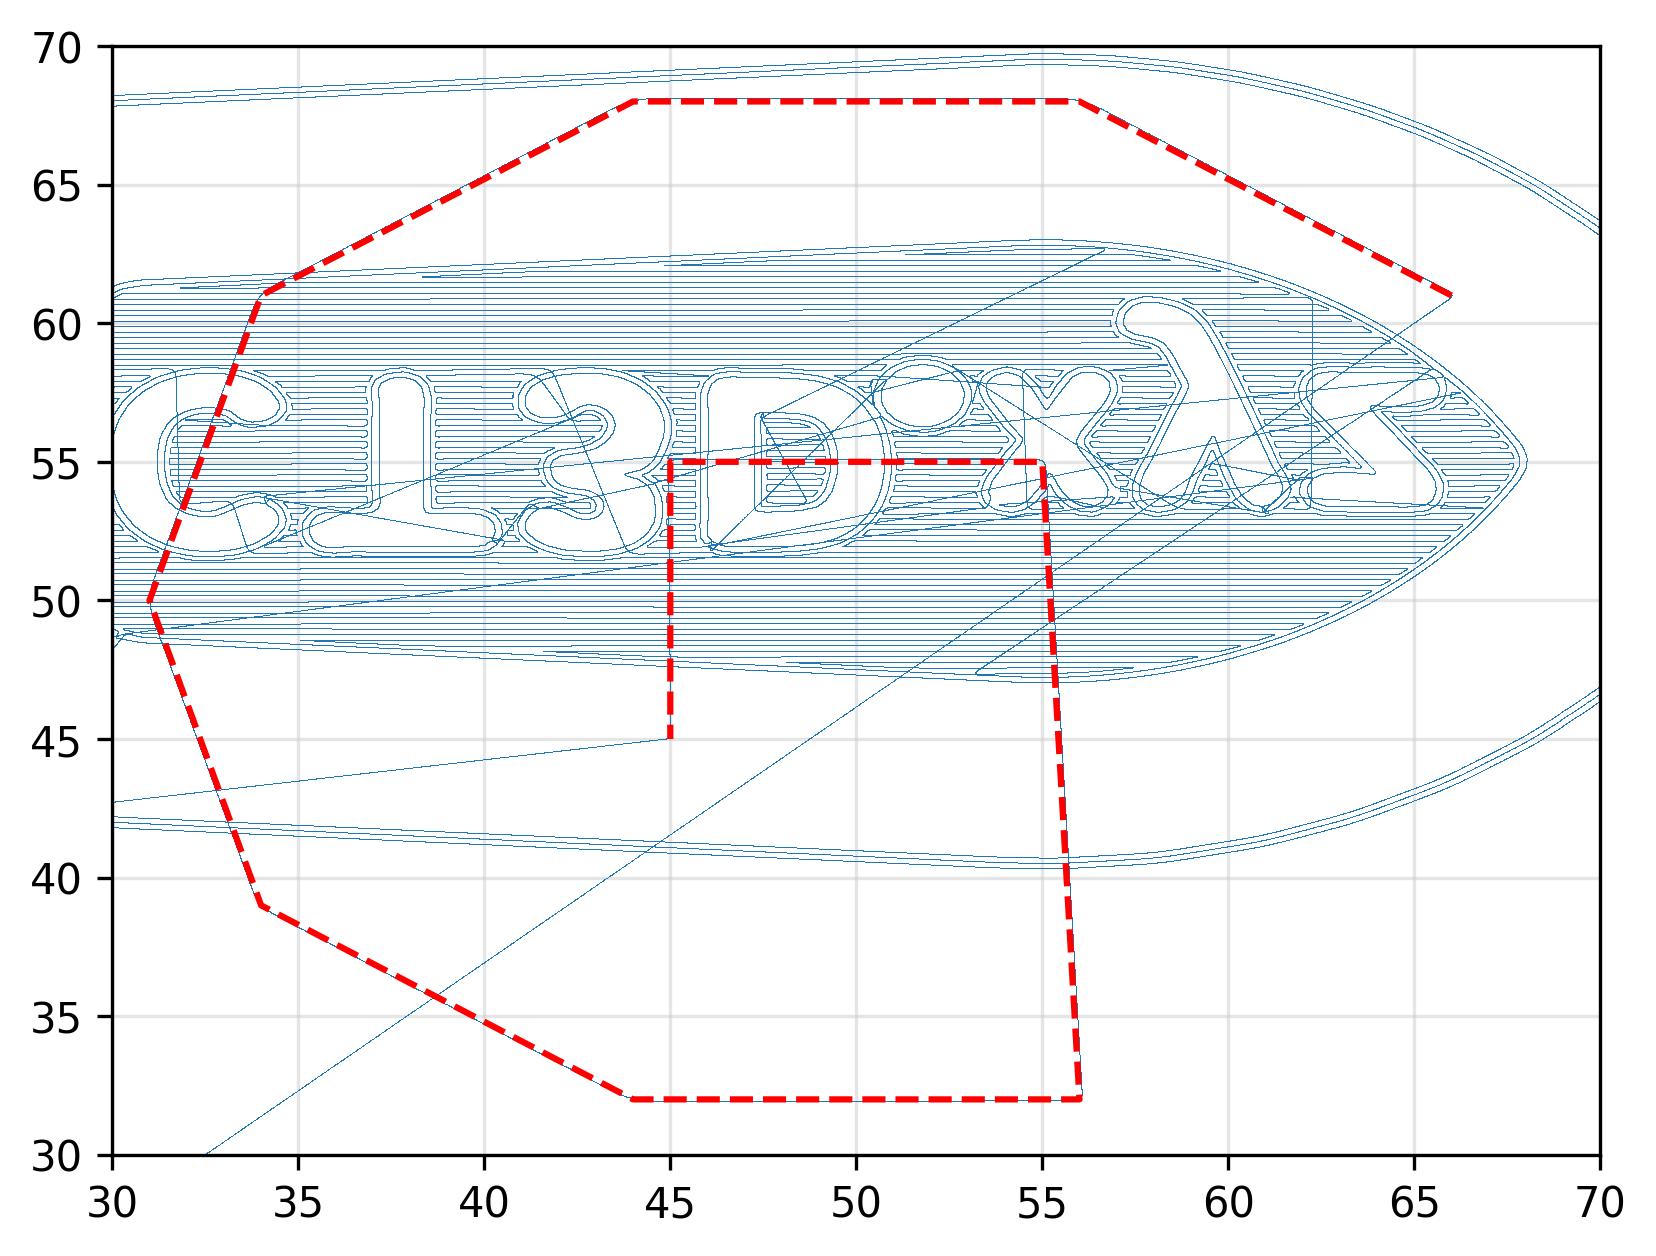

In [184]:
import csv
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.color'] = "#cccccc"

def read_csv(file_path):
    x_values, y_values = [], []
    with open(file_path, "r") as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            x_values.append(float(row[0]))
            y_values.append(float(row[1]))
    return x_values, y_values

def plot_2d_points(x, y):
    plt.plot(x, y, ",")
    plt.plot([66.0,56.0,44.0,34.0,31.0,34.0,44.0,56.0,55.0,45.0,45.0], [61.0,68.0,68.0,61.0,50.0,39.0,32.0,32.0,55.0,55.0,45.0], "--r")
    plt.xlim((30, 70))
    plt.ylim((30, 70))
    plt.show()

x_values, y_values = read_csv("tmp.csv")
plot_2d_points(x_values, y_values)

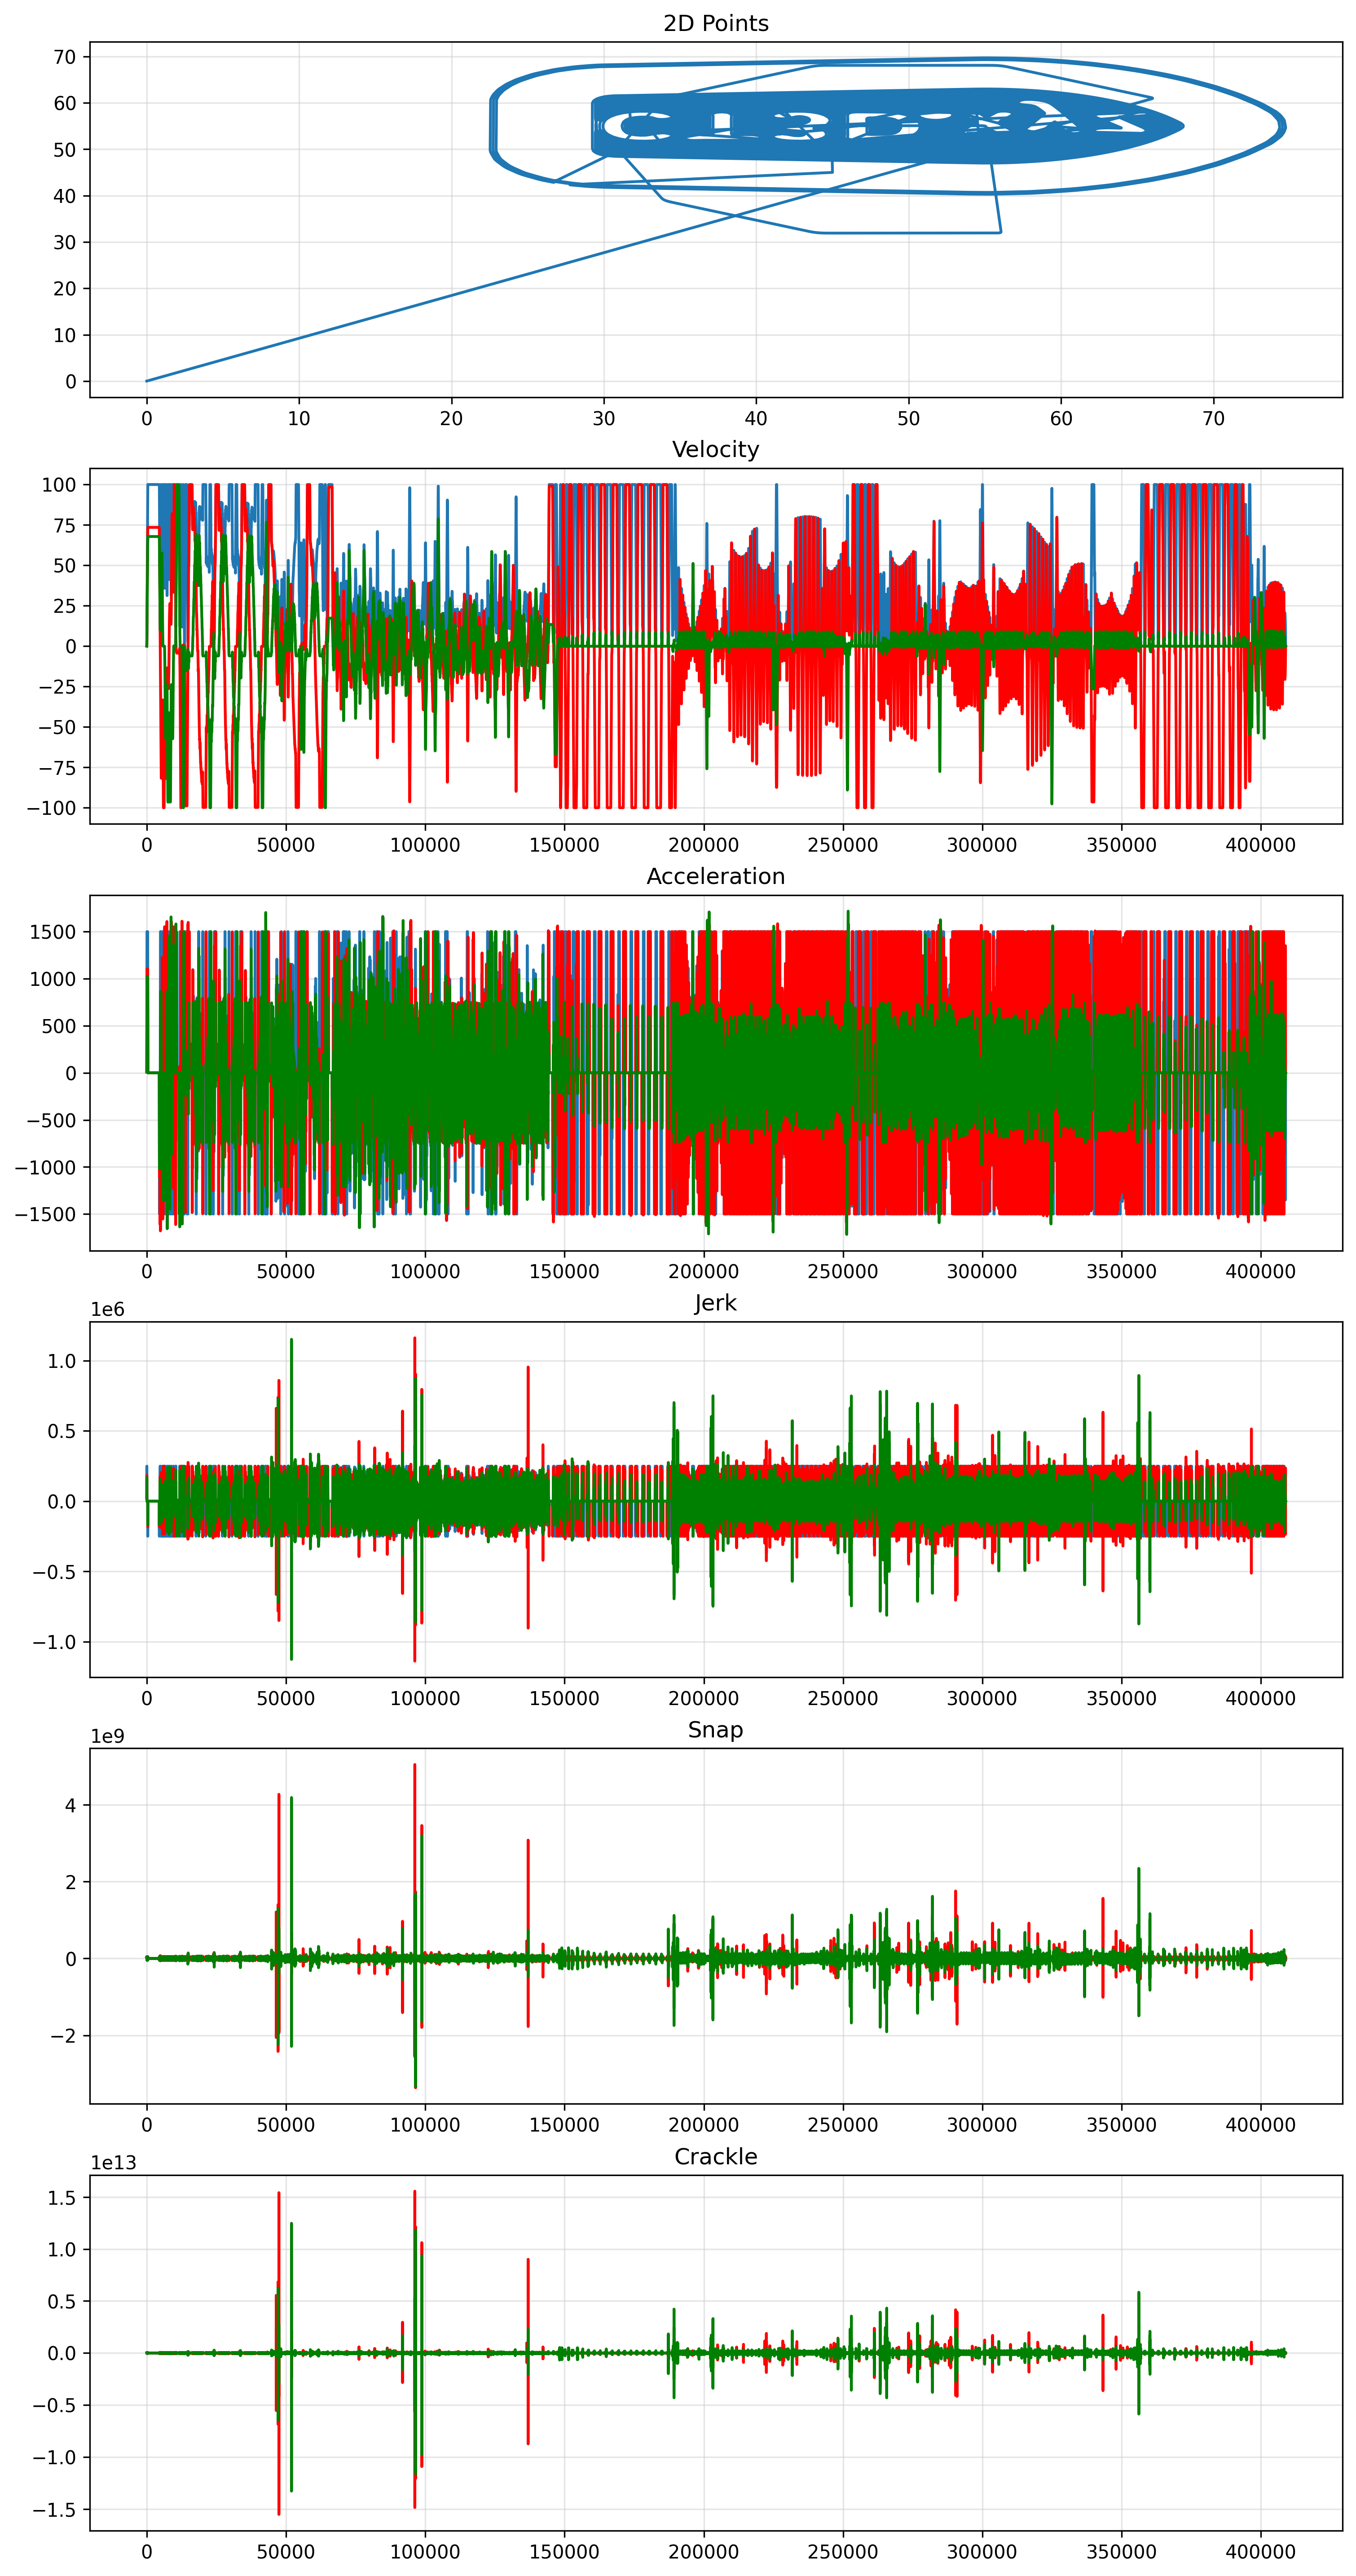

In [185]:
import numpy as np
from math import sqrt

step_time = 0.0002

def plot_kinematics(x, y):
    velocities = []
    velocities_x = []
    velocities_y = []
    for i in range(1, len(x)):
        velocity = sqrt((x[i] - x[i - 1])**2 + (y[i] - y[i - 1])**2)
        velocity_x = x[i] - x[i - 1]
        velocity_y = y[i] - y[i - 1]
        velocities.append(velocity / step_time)
        velocities_x.append(velocity_x / step_time)
        velocities_y.append(velocity_y / step_time)

    derivatives = [np.array(velocities)]
    derivatives_x = [np.array(velocities_x)]
    derivatives_y = [np.array(velocities_y)]
    for i in range(4):
        derivatives.append(np.gradient(derivatives[-1], step_time))
        derivatives_x.append(np.gradient(derivatives_x[-1], step_time))
        derivatives_y.append(np.gradient(derivatives_y[-1], step_time))

    fig, axes = plt.subplots(6, 1, figsize=(12, 24))

    axes[0].plot(x, y, "-")
    axes[0].set_title("2D Points")

    axes[1].plot(velocities[5:], "-")
    axes[1].plot(velocities_x[5:], "-r")
    axes[1].plot(velocities_y[5:], "-g")
    axes[1].set_title("Velocity")

    for i in range(4):
        axes[i+2].plot(derivatives[i+1][5:], "-")
        axes[i+2].plot(derivatives_x[i+1][5:], "-r")
        axes[i+2].plot(derivatives_y[i+1][5:], "-g")
        names = ["Acceleration", "Jerk", "Snap", "Crackle", "Pop"]
        axes[i+2].set_title(names[i])

    plt.show()

aa = 597500
bb = 500
#plot_kinematics(x_values[aa:aa + bb], y_values[aa:aa + bb])

plot_kinematics(x_values, y_values)

/tmp/ipykernel_10953/247051470.py:14: RuntimeWarning: invalid value encountered in scalar power
  Tri_Area = 0.25 * (


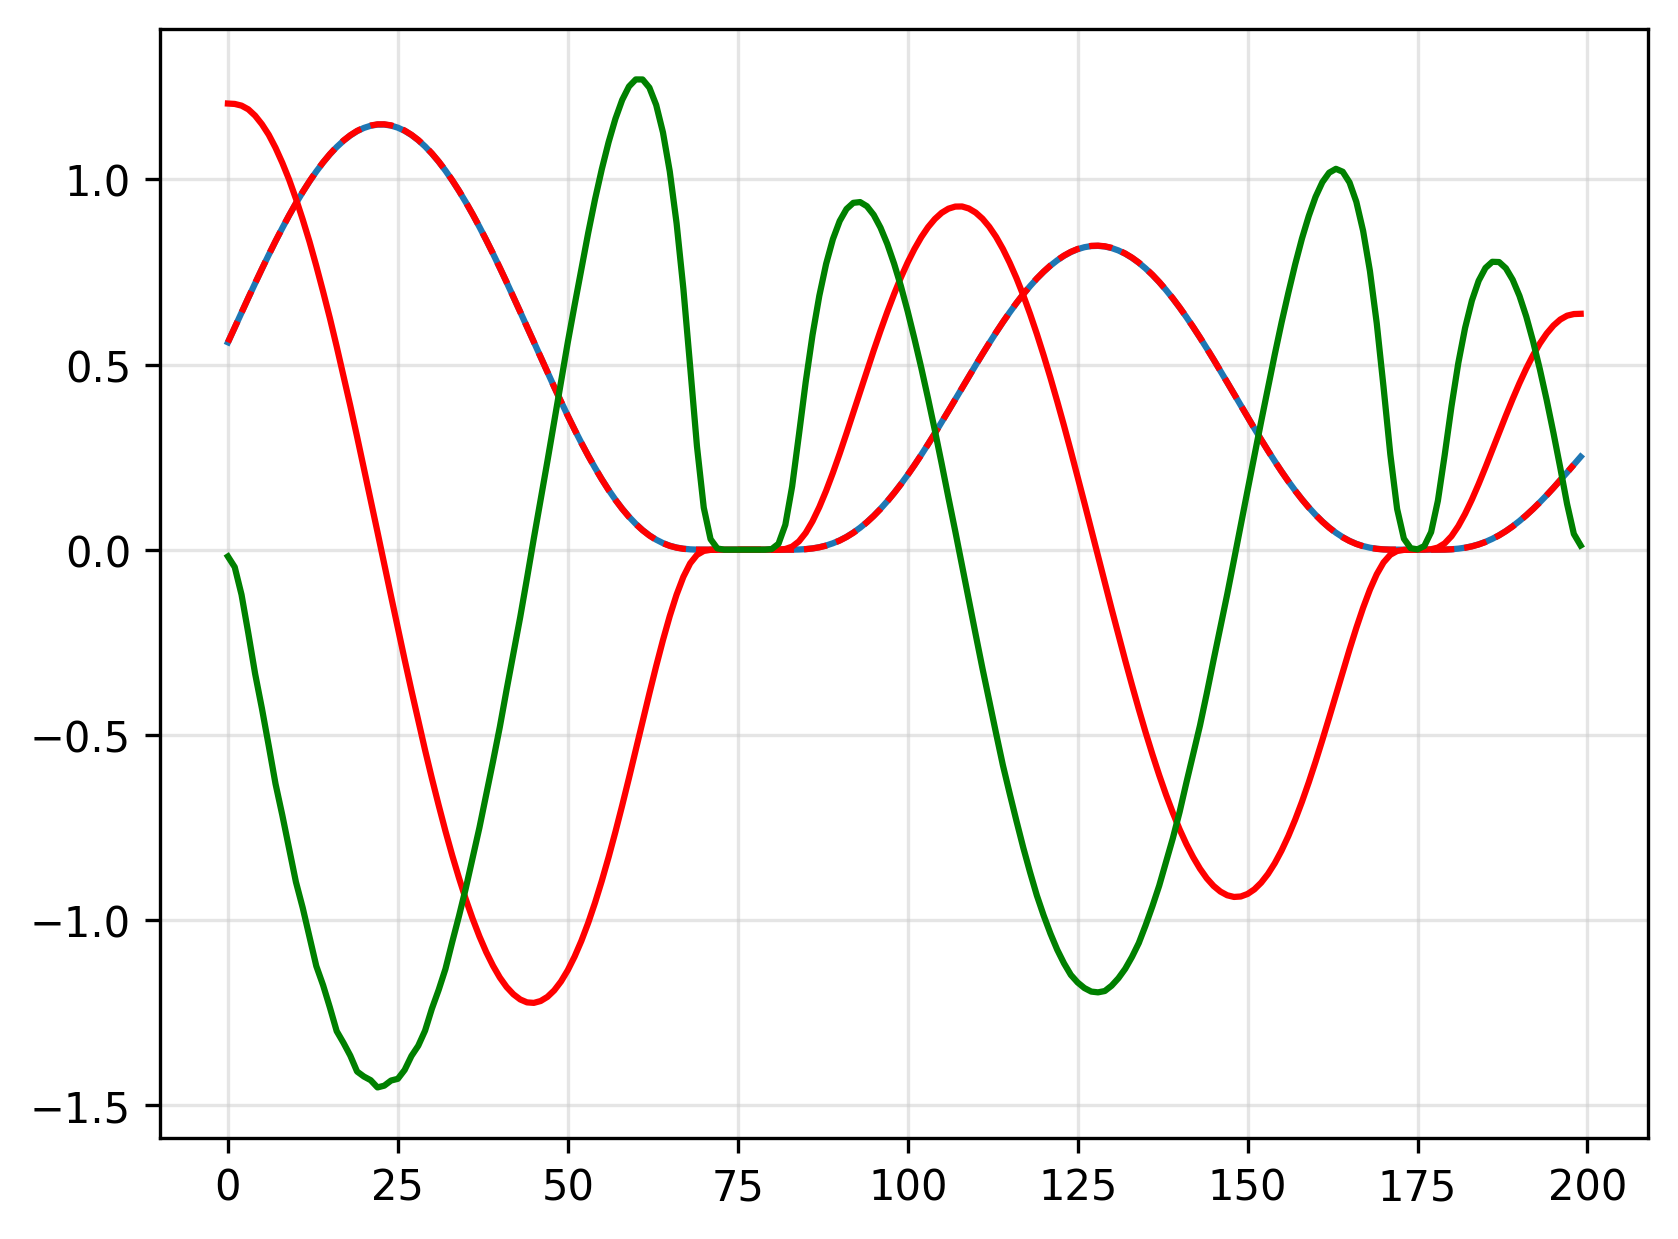

In [208]:
dx = np.gradient(x_values)
dy = np.gradient(y_values)

d2x = np.gradient(dx)
d2y = np.gradient(dy)

curvature = np.abs(dx * d2y - d2x * dy) / (dx * dx + dy * dy)**1.5

def compute_curvature(A, B, C):
    Side_AB = np.linalg.norm(A - B)
    Side_AC = np.linalg.norm(A - C)
    Side_BC = np.linalg.norm(B - C)
    
    Tri_Area = 0.25 * (
        (Side_AB + Side_AC + Side_BC) *
        (-Side_AB + Side_AC + Side_BC) *
        (Side_AB - Side_AC + Side_BC) *
        (Side_AB + Side_AC - Side_BC)
    ) ** 0.5
    
    return (4.0 * Tri_Area) / (Side_AB * Side_AC * Side_BC)

def calculate_menger_curvature(x_points, y_points):
    curvatures = []
    
    for i in range(1, len(x_points) - 1):
        A = np.array([x_points[i-1], y_points[i-1]])
        B = np.array([x_points[i], y_points[i]])
        C = np.array([x_points[i+1], y_points[i+1]])
        
        curvature = compute_curvature(A, B, C)
        curvatures.append(curvature)
    
    return curvatures

aa = 99000
bb = 200

plt.plot(curvature[aa:aa + bb], "-")
plt.plot(calculate_menger_curvature(x_values[aa - 1:aa + bb], y_values[aa - 1:aa + bb]), "--r")
plt.plot(np.gradient(curvature[aa:aa + bb]) * 30, "-r")
plt.plot(np.gradient(np.gradient(curvature[aa:aa + bb])) * 500, "-g")
plt.show()